[*********************100%***********************]  1 of 1 completed
Cluster
0   -0.556151
1    0.382925
2   -2.366209
3    3.780425
4    1.971245
5   -6.019897
6   -1.177502
7   -0.071334
8    0.962503
Name: Returns, dtype: float64
7    257
1    195
0    173
8    105
6     86
4     30
2     27
3     13
5      4
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


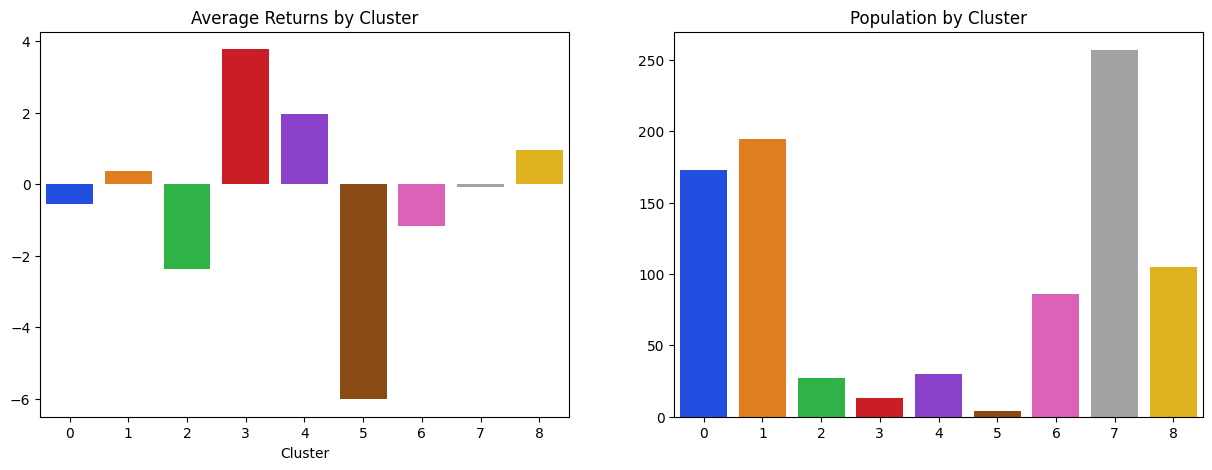

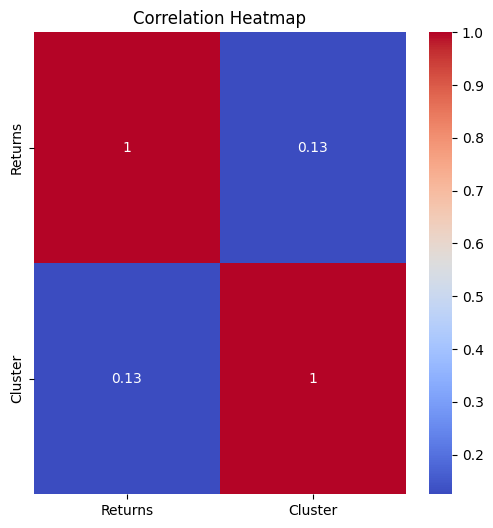

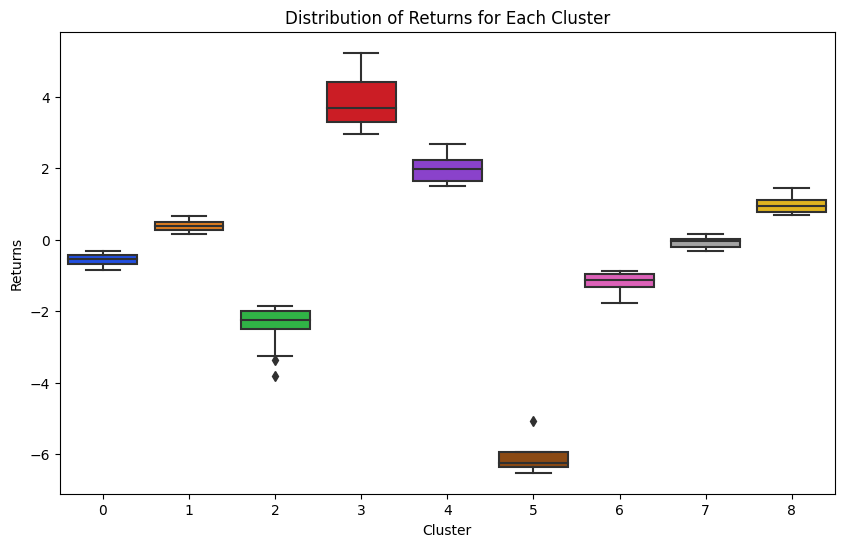

Visualize with test data



Cluster
0   -0.553349
1    0.370960
2   -2.024150
3    3.786551
4    1.738056
6   -1.178423
7   -0.071399
8    0.916755
Name: Returns, dtype: float64
7    65
1    53
0    40
8    25
6    24
4    11
3     4
2     1
Name: Cluster, dtype: int64


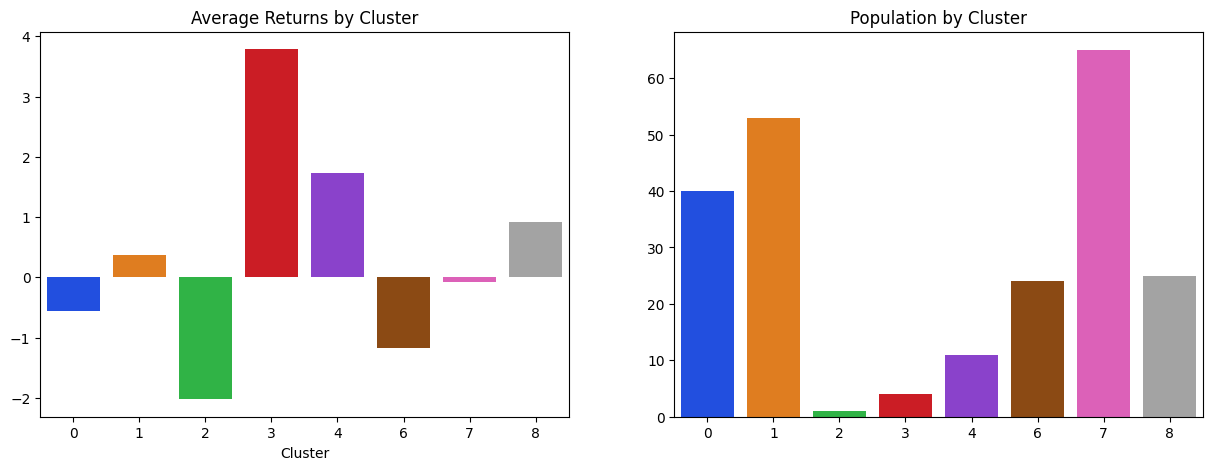

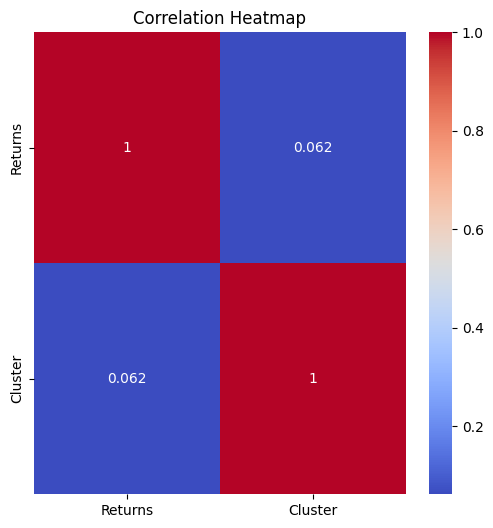

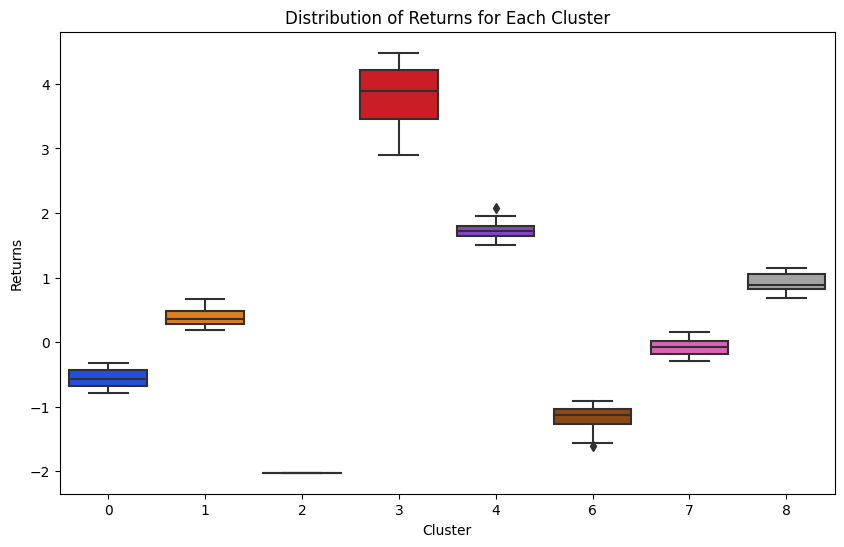

In [5]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "DXY"
start_date = "2015-01-01"
end_date = "2021-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

#Return_Daily=V_(today-V_yesterday )/V_yesterday *100

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# Perform KMeans clustering on the training set
kmeans = KMeans(n_clusters=9, random_state=0).fit(X_train)
X_train['Cluster'] = kmeans.labels_

# Apply the clustering to the test set
X_test['Cluster'] = kmeans.predict(X_test)



# Calculate the average returns for each cluster
cluster_returns = X_train.groupby('Cluster')['Returns'].mean()
print(cluster_returns)

# Calculate the population of each cluster
cluster_population = X_train['Cluster'].value_counts()
print(cluster_population)


# Plot the cluster returns and population
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x=cluster_returns.index, y=cluster_returns.values, palette='bright', ax=axs[0])
sns.barplot(x=cluster_population.index, y=cluster_population.values, palette='bright', ax=axs[1])

axs[0].set(title='Average Returns by Cluster')

axs[1].set(title='Population by Cluster')

plt.show()



# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()


# Visualize the distribution of returns for each cluster using a box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_train, x='Cluster', y='Returns', palette='bright')
plt.title('Distribution of Returns for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.show()





print("Visualize with test data\n\n\n")




# Calculate the average returns for each cluster
cluster_returns = X_test.groupby('Cluster')['Returns'].mean()
print(cluster_returns)

# Calculate the population of each cluster
cluster_population = X_test['Cluster'].value_counts()
print(cluster_population)


# Plot the cluster returns and population
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x=cluster_returns.index, y=cluster_returns.values, palette='bright', ax=axs[0])
sns.barplot(x=cluster_population.index, y=cluster_population.values, palette='bright', ax=axs[1])

axs[0].set(title='Average Returns by Cluster')

axs[1].set(title='Population by Cluster')

plt.show()



# Calculate the correlation matrix
corr_matrix = X_test.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()


# Visualize the distribution of returns for each cluster using a box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_test, x='Cluster', y='Returns', palette='bright')
plt.title('Distribution of Returns for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.show()
